In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import pickle

with open('scaled_data.pkl', 'rb') as picklefile:
    df_scaled = pickle.load(picklefile)

In [ ]:
### OUTLIERS FROM FULL DATASET

In [3]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn import svm

lof = LocalOutlierFactor(contamination = .025)

LOF_list_full = lof.fit(df_scaled).negative_outlier_factor_
LOF_list_full_index = list(zip(LOF_list_full, df_scaled.index))

In [4]:
LOF_labels = lof.fit_predict(df_scaled)

In [5]:
unique, count = np.unique(LOF_labels, return_counts = True)
print(count)

[ 169 6578]


In [6]:
np.mean(LOF_list_full)

-1844.8033011296711

In [7]:
np.median(LOF_list_full)

-1.2463027588691442

In [8]:
np.std(LOF_list_full)

35567.69377607321

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


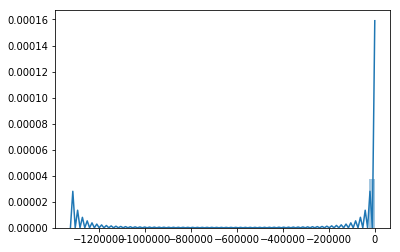

In [9]:
sns.distplot(LOF_list_full)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


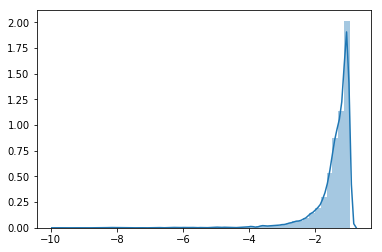

In [10]:
sns.distplot(sorted(LOF_list_full)[50:])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


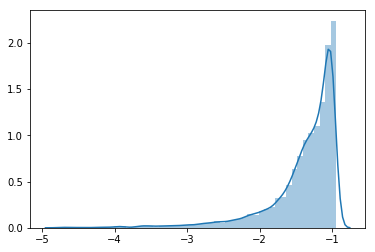

In [11]:
sns.distplot(sorted(LOF_list_full)[100:])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


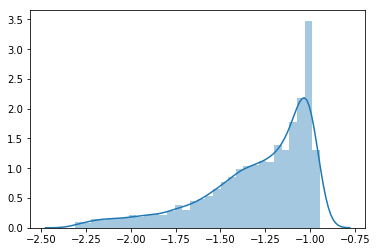

In [12]:
sns.distplot(sorted(LOF_list_full)[500:])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


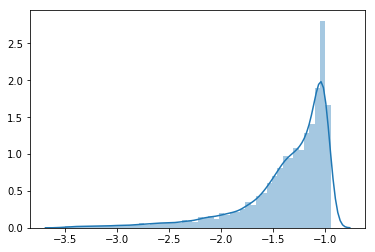

In [13]:
sns.distplot(sorted(LOF_list_full)[169:])

In [14]:
(np.mean(sorted(LOF_list_full)[169:]))

-1.3710359496099103

In [15]:
np.median(sorted(LOF_list_full)[169:])

-1.235530200376157

In [16]:
np.std(sorted(LOF_list_full)[169:])

0.437974086212883

In [17]:
### VISUALIZATION

In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
tsne_data = tsne.fit_transform(df_scaled)

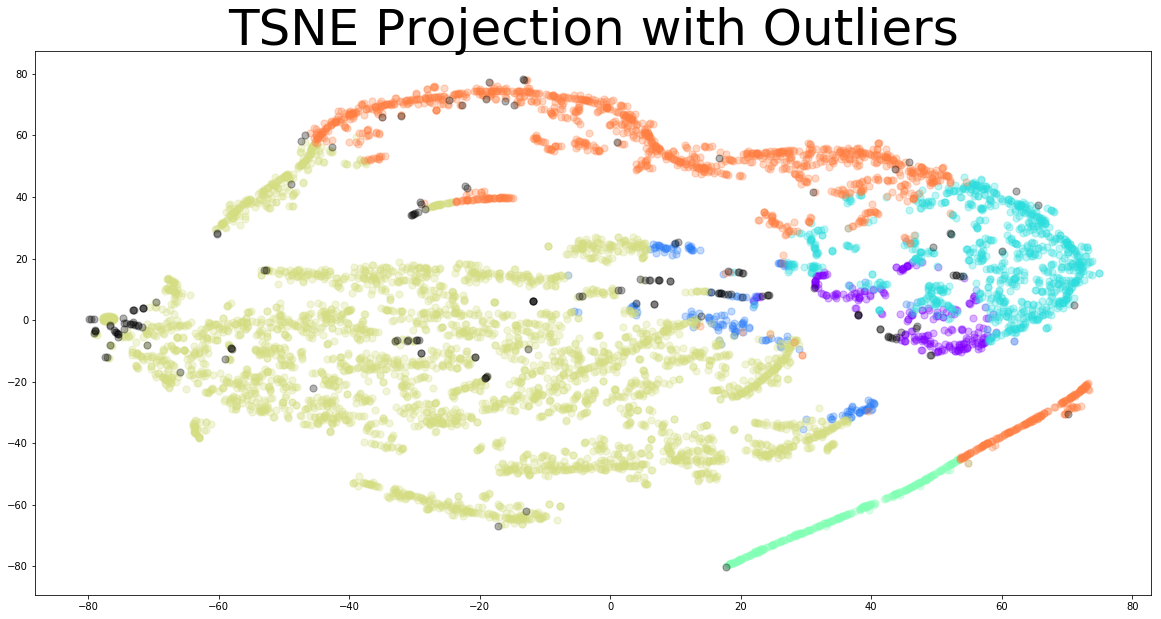

In [24]:
from sklearn import cluster
import matplotlib.pyplot as plt

km = cluster.MiniBatchKMeans(n_clusters = 6, random_state = 1)
km.fit(df_scaled)
#print(len(set(km.labels_)))
labels = km.labels_.copy()
#Label outliers
for index, label in enumerate(LOF_labels):
    if label == -1:
        labels[index] = -1

unique_labels = set(labels)
#print(len(set(km.labels_)))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels))) 
plt.figure(figsize=(20,10))     
    
for label, col in zip(unique_labels, colors):
    if label == -1:
        # Black used for outliers.
        col = 'k'
    
    class_member_mask = (labels == label)
    xy = tsne_data[class_member_mask]
    x, y = xy[:,0], xy[:,1]
    plt.scatter(x, y, c=col, s=50, linewidths=1.1, alpha=0.3)
    
plt.title('TSNE Projection with Outliers', fontsize=50)
plt.savefig('kmeans_tsne_w_outliers.png')

In [241]:
### OUTLIERS BY CLUSTER

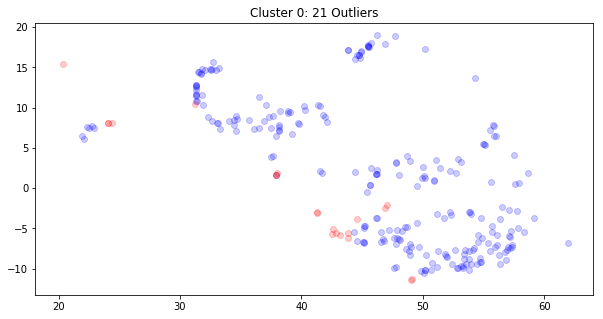

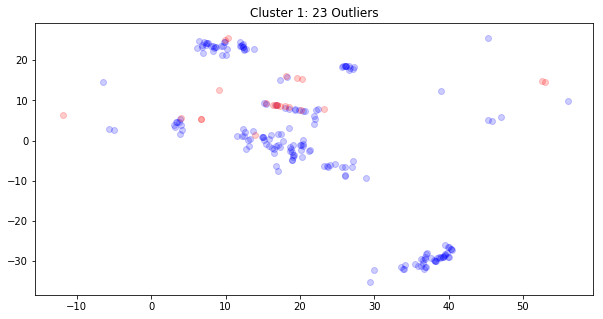

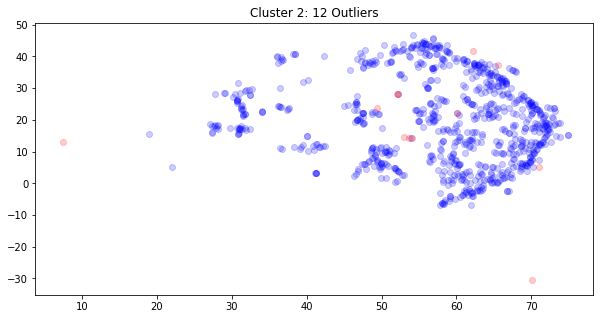

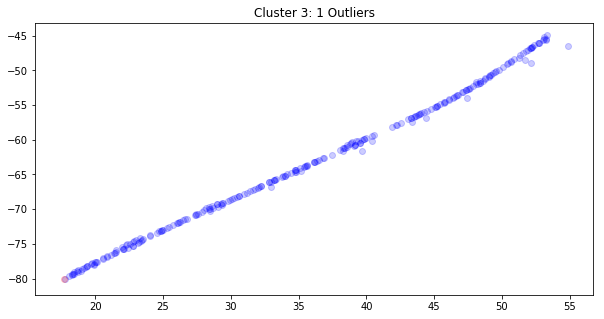

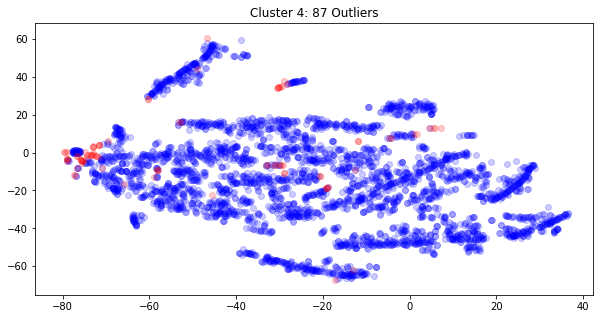

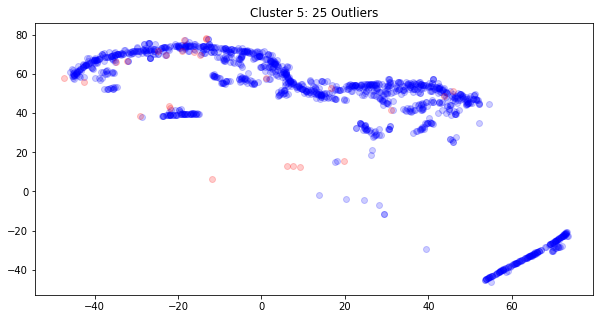

In [29]:
from sklearn import cluster
import matplotlib.pyplot as plt
     
labels = km.labels_

unique_labels = set(labels)

i = 0 
for cluster_label in range(6):
    
    plt.figure(figsize=(10, 5))
    no_outliers = 0
    
    for LOF_label in set(LOF_labels):
        
        cluster_mask = (labels == cluster_label)
        outlier_mask = (LOF_labels == LOF_label)
        cluster_outlier_mask = [(cluster and outlier) for outlier, cluster in zip(outlier_mask, cluster_mask)]
        
        
        if LOF_label == -1:
            # Red used for outliers.
            col = 'r'
            no_outliers = sum(LOF_labels[cluster_outlier_mask]) * -1
            #print(no_outliers)
        
        else:
            col = 'b'

#         cluster_inlier_mask = [(cluster and inlier) for inlier, cluster in zip(inlier_mask, cluster_mask)]
#         xy = tsne_data[cluster_inlier_mask]
#         x, y = xy[:,0], xy[:,1]
#         plt.scatter(x, y, c='b', alpha = .2)

        
        xy = tsne_data[cluster_outlier_mask]
        x, y = xy[:,0], xy[:,1]
        plt.scatter(x, y, c=col, alpha = .2)


    plt.title(f'Cluster {i}: {no_outliers} Outliers')
    i += 1

In [32]:
sorted(LOF_list_full_index)[:10]

[(-1323886.2310624602, 1210),
 (-1179118.0708412905, 268),
 (-962519.3422917679, 1174),
 (-884345.8801907658, 2088),
 (-838095.7006895442, 6528),
 (-724373.8625307332, 5899),
 (-708761.9749797296, 3900),
 (-629925.9318619374, 6169),
 (-509505.3857273062, 4031),
 (-486095.1981038895, 3953)]

In [ ]:
1210